In [1]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [2]:
import my_cadet_utils as cad_utils
from cadet_imports import *

# Langmuir isotherm

In [3]:
linear_gradient_model = cad_utils.get_cadet_template(n_units=2)
n_comp = 2
Q = 1e-3

# INLET
linear_gradient_model.root.input.model.unit_000.unit_type = 'INLET'
linear_gradient_model.root.input.model.unit_000.ncomp = n_comp
linear_gradient_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# CSTR
linear_gradient_model.root.input.model.unit_001.unit_type = 'CSTR'
linear_gradient_model.root.input.model.unit_001.use_analytic_jacobian = 0

linear_gradient_model.root.input.model.unit_001.ncomp = n_comp
linear_gradient_model.root.input.model.unit_001.init_volume = 1e-3
linear_gradient_model.root.input.model.unit_001.porosity = 0.694
linear_gradient_model.root.input.model.unit_001.init_c = n_comp*[0]
linear_gradient_model.root.input.model.unit_001.init_q = n_comp*[0]
linear_gradient_model.root.input.model.unit_001.flow_rate_filter = Q

# Sections and Switches
linear_gradient_model.root.input.solver.sections.nsec = 1
linear_gradient_model.root.input.solver.sections.section_times = [0.0, 200]

linear_gradient_model.root.input.model.unit_000.sec_000.const_coeff = [0.0, 0]
linear_gradient_model.root.input.model.unit_000.sec_000.lin_coeff = [0, 1]

linear_gradient_model.root.input.model.connections.nswitches = 1
linear_gradient_model.root.input.model.connections.switch_000.section = 0
linear_gradient_model.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, Q]

adsorption_model = 'MULTI_COMPONENT_LANGMUIR'
adsorption_parameters = Dict()
adsorption_parameters.is_kinetic = False
adsorption_parameters.mcl_ka = [0, 10.0]
adsorption_parameters.mcl_kd = [0, 1]
adsorption_parameters.mcl_qmax = [0, 100.0]

linear_gradient_model.root.input.model.unit_001.nbound = [0, 1]
linear_gradient_model.root.input.model.unit_001.adsorption_model = adsorption_model
linear_gradient_model.root.input.model.unit_001.adsorption = adsorption_parameters

cad_utils.run_simulation(linear_gradient_model)
solution_bulk  = linear_gradient_model.root.output.solution.unit_001.solution_bulk
solution_solid = linear_gradient_model.root.output.solution.unit_001.solution_solid

Simulation completed successfully


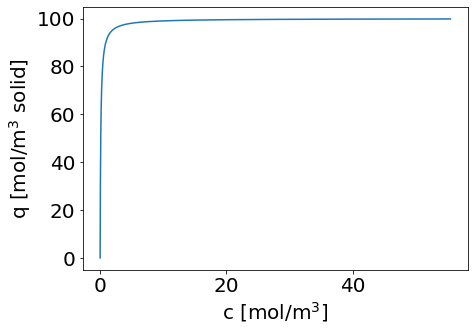

In [5]:
fig, ax = plt.subplots()
params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
plt.xlabel('c [mol/m$^3$]')
plt.ylabel('q [mol/m$^3$ solid]')
fig.set_size_inches(7, 5, forward=True)
# ax.set_xlim(-0.1, 5)

ax.plot(solution_bulk[:,1], solution_solid[:,0])

# Colloidal isotherm

In [11]:
linear_gradient_model = cad_utils.get_cadet_template(n_units=2)
n_comp = 2
Q = 1e-3

# INLET
linear_gradient_model.root.input.model.unit_000.unit_type = 'INLET'
linear_gradient_model.root.input.model.unit_000.ncomp = n_comp
linear_gradient_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# CSTR
linear_gradient_model.root.input.model.unit_001.unit_type = 'CSTR'
linear_gradient_model.root.input.model.unit_001.use_analytic_jacobian = 0

linear_gradient_model.root.input.model.unit_001.ncomp = n_comp
linear_gradient_model.root.input.model.unit_001.init_volume = 1e-3
linear_gradient_model.root.input.model.unit_001.porosity = 0.694
linear_gradient_model.root.input.model.unit_001.init_c = n_comp*[0.0]
linear_gradient_model.root.input.model.unit_001.init_q = n_comp*[0.0]
linear_gradient_model.root.input.model.unit_001.flow_rate_filter = Q

# Sections and Switches
linear_gradient_model.root.input.solver.sections.nsec = 1
linear_gradient_model.root.input.solver.sections.section_times = [0.0, 200]

linear_gradient_model.root.input.model.unit_000.sec_000.const_coeff = [0.0, 0.0]
linear_gradient_model.root.input.model.unit_000.sec_000.lin_coeff = [0.0, 1]

linear_gradient_model.root.input.model.connections.nswitches = 1
linear_gradient_model.root.input.model.connections.switch_000.section = 0
linear_gradient_model.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, Q]

adsorption_model = "MULTI_COMPONENT_COLLOIDAL"
adsorption_parameters = Dict()
adsorption_parameters.is_kinetic = False
adsorption_parameters.col_phi = [0, 1]
adsorption_parameters.col_kappa_exp = [0, 1]
adsorption_parameters.col_kappa_fact = [0, 1]
adsorption_parameters.col_kappa_const = [0, 1] # e9
adsorption_parameters.col_cordnum = [0, 1]
adsorption_parameters.col_logkeq_ph_exp = [0, 1]
adsorption_parameters.col_logkeq_salt_powexp = [0, 1]
adsorption_parameters.col_logkeq_salt_powfact = [0, 1]
adsorption_parameters.col_logkeq_salt_expfact = [0, 1]
adsorption_parameters.col_logkeq_salt_expargmult = [0, 1]
adsorption_parameters.col_bpp_ph_exp = [0, 1]
adsorption_parameters.col_bpp_salt_powexp = [0, 1]
adsorption_parameters.col_bpp_salt_powfact = [0, 1]
adsorption_parameters.col_bpp_salt_expfact = [0, 1]
adsorption_parameters.col_bpp_salt_expargmult = [0, 1]
adsorption_parameters.col_radius = [0, 1]
adsorption_parameters.col_kkin = [0, 1]
adsorption_parameters.col_linear_threshold = 1.0
adsorption_parameters.col_use_ph = False

linear_gradient_model.root.input.model.unit_001.nbound = [0, 1]
linear_gradient_model.root.input.model.unit_001.adsorption_model = adsorption_model
linear_gradient_model.root.input.model.unit_001.adsorption = adsorption_parameters

cad_utils.run_simulation(linear_gradient_model)
solution_bulk  = linear_gradient_model.root.output.solution.unit_001.solution_bulk
solution_solid = linear_gradient_model.root.output.solution.unit_001.solution_solid

CompletedProcess(args=['/home/chase/codes/cadet/cadet/bin/cadet-cli', '/home/chase/my_work/cadet/test_isotherm/temp_files/8w87okpq.h5'], returncode=3, stdout=b"\nIntel MKL ERROR: Parameter 5 was incorrect on entry to DGELS.\n[Error: idasErrorHandler::200] In function 'IDASolve' of module 'IDAS', error code 'IDA_CONV_FAIL':\nAt t = 0 and h = 9.53674e-13, the corrector convergence failed repeatedly or with |h| = hmin.\n[Error: integrate::1364] IDASolve returned IDA_CONV_FAIL at t = 0\n", stderr=b'SOLVER ERROR: Error in IDASolve: IDA_CONV_FAIL at t = 0.000000\n')


Exception: Simulation failed

# Isotherm I added - "test"

In [59]:
# linear_gradient_model = cad_utils.get_cadet_template(n_units=2)
# n_comp = 1
# Q = 1e-3

# # INLET
# linear_gradient_model.root.input.model.unit_000.unit_type = 'INLET'
# linear_gradient_model.root.input.model.unit_000.ncomp = n_comp
# linear_gradient_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# # CSTR
# linear_gradient_model.root.input.model.unit_001.unit_type = 'CSTR'
# linear_gradient_model.root.input.model.unit_001.ncomp = n_comp
# linear_gradient_model.root.input.model.unit_001.init_volume = 1e-3
# linear_gradient_model.root.input.model.unit_001.porosity = 0.694
# linear_gradient_model.root.input.model.unit_001.init_c = n_comp*[0.0]
# linear_gradient_model.root.input.model.unit_001.init_q = n_comp*[0.0]
# linear_gradient_model.root.input.model.unit_001.flow_rate_filter = Q

# # Sections and Switches
# linear_gradient_model.root.input.solver.sections.nsec = 1
# linear_gradient_model.root.input.solver.sections.section_times = [0.0, 50]

# linear_gradient_model.root.input.model.unit_000.sec_000.const_coeff = [0.0]
# linear_gradient_model.root.input.model.unit_000.sec_000.lin_coeff = [1]

# linear_gradient_model.root.input.model.connections.nswitches = 1
# linear_gradient_model.root.input.model.connections.switch_000.section = 0
# linear_gradient_model.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, Q]

# adsorption_model = 'TEST'
# adsorption_parameters = Dict()
# adsorption_parameters.is_kinetic = False
# adsorption_parameters.test_kkin = [1.0e0]
# adsorption_parameters.test_keq = [1.0e35]
# adsorption_parameters.test_bpp = [1.0]
# adsorption_parameters.test_phi = [1.0e7] # 1.0e7
# adsorption_parameters.test_kappa = [1.0e9] # 1.0e9
# adsorption_parameters.test_a = [1.0e-9] # 1.0e-9

# linear_gradient_model.root.input.model.unit_001.nbound = [1]
# linear_gradient_model.root.input.model.unit_001.adsorption_model = adsorption_model
# linear_gradient_model.root.input.model.unit_001.adsorption = adsorption_parameters

# cad_utils.run_simulation(linear_gradient_model)
# solution_bulk  = linear_gradient_model.root.output.solution.unit_001.solution_bulk
# solution_solid = linear_gradient_model.root.output.solution.unit_001.solution_solid

In [13]:
# fig, ax = plt.subplots()
# params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
# plt.rcParams.update(params)
# plt.xlabel('c [mol/m$^3$]')
# plt.ylabel('q [mol/m$^3$ solid]')
# fig.set_size_inches(7, 5, forward=True)

# # f = 1.0
# # ax.set_xlim(-1.0*f, f)
# # ax.set_ylim(-1.0*f, f)

# ax.plot(solution_bulk[:,0], solution_solid[:,0], label='CADET')

# ax.legend(loc='best', frameon=False, handlelength=1.0)
# fig.patch.set_facecolor('white')
# # fig.savefig('working_domain.png', dpi=300)